In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:

# Download stopwords
nltk.download('stopwords')

# Load dataset
data = pd.read_csv('movie_review_data.csv')

# Check class distribution
print(data['sentiment'].value_counts())

sentiment
positive    1000
negative    1000
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

# Drop missing values
data.dropna(inplace=True)



In [9]:
# Define function to clean reviews
def clean_review(review):
    return ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))

# Apply cleaning function to the reviews
data['cleaned_review'] = data['review'].apply(clean_review)

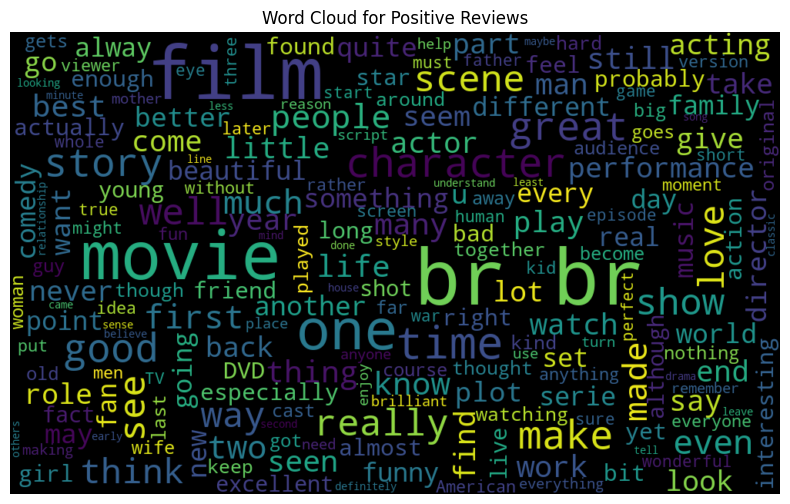

In [10]:
# Generate word cloud for positive reviews
positive_reviews = ' '.join(review for review in data['cleaned_review'][data['sentiment'] == 'positive'])
wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

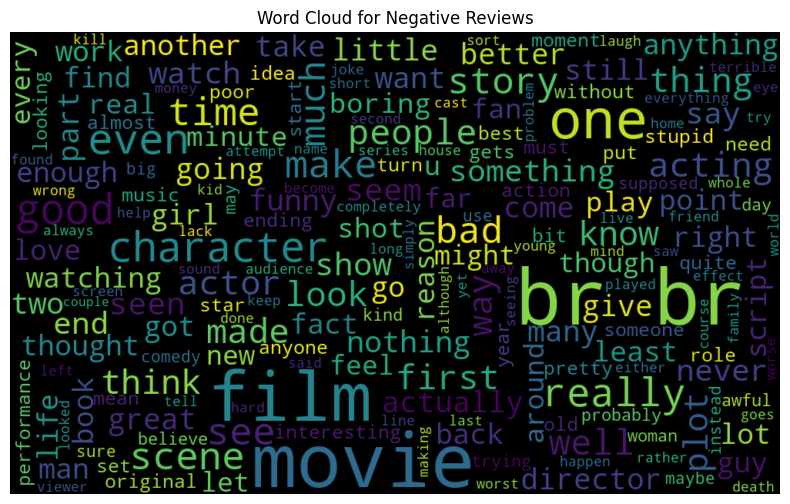

In [11]:

# Generate word cloud for negative reviews
negative_reviews = ' '.join(review for review in data['cleaned_review'][data['sentiment'] == 'negative'])
wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [12]:

# Replace sentiment values with 1 (positive) and 0 (negative)
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


C:\Users\spook\AppData\Local\Temp\ipykernel_13140\1393171195.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


In [13]:

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['sentiment']


In [14]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



Accuracy: 0.79
Confusion Matrix:
[[168  37]
 [ 49 146]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       205
           1       0.80      0.75      0.77       195

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [16]:
# Function to predict sentiment of a new review
def predict_sentiment(review):
    cleaned_review = clean_review(review)
    review_vector = vectorizer.transform([cleaned_review]).toarray()
    prediction = classifier.predict(review_vector)
    sentiment = 'positive' if prediction == 1 else 'negative'
    return sentiment

In [17]:


# Input a new review
new_review = input("Enter a movie review: ")
print(f'New Review: {new_review}')
print(f'Predicted Sentiment: {predict_sentiment(new_review)}')

New Review: good
Predicted Sentiment: positive
